# Long Term Investment Strategy Analysis

In [1]:
## Includes SMA, Volume, RSI, and Industry analysis 

In [45]:
import pandas as pd
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [46]:
# Data set: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating/data

In [47]:
# Define the file path
world_stock_prices_dataset = "/Users/annatoaze/Downloads/World-Stock-Prices-Dataset.csv"

# Read the CSV file into a DataFrame
world_stock_prices_dataset_df = pd.read_csv(world_stock_prices_dataset, parse_dates=["Date"])


In [48]:
world_stock_prices_dataset_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
279748,2023-08-29 00:00:00-04:00,18.719999,18.770000,18.020000,18.320000,5949600.0,0.0,0.0,foot locker,FL,footwear,usa
279749,2023-08-30 00:00:00-04:00,18.180000,18.650000,17.879999,18.549999,5829500.0,0.0,0.0,foot locker,FL,footwear,usa
279750,2023-08-31 00:00:00-04:00,18.620001,19.850000,18.469999,19.620001,6316100.0,0.0,0.0,foot locker,FL,footwear,usa
279751,2023-09-01 00:00:00-04:00,19.660000,20.139999,19.400000,19.870001,3982400.0,0.0,0.0,foot locker,FL,footwear,usa


#### Find the closing prices per ticker

In [49]:
# Select only columns 'Ticker' and 'Close' from the existing DataFrame
closing_prices_df = world_stock_prices_dataset_df[['Date', 'Ticker', 'Close']]

# Set 'Date' column as the index
closing_prices_df.set_index('Date', inplace=True)

# Extract the date component from the index
closing_prices_df.index = [date.date() for date in closing_prices_df.index]

# Display the new DataFrame
print(closing_prices_df)

           Ticker       Close
2023-09-20   PTON    4.670000
2023-09-20   NFLX  386.299988
2023-09-20   COST  563.830017
2023-09-20   AMZN  135.289993
2023-09-20   AAPL  175.490005
...           ...         ...
2023-08-29     FL   18.320000
2023-08-30     FL   18.549999
2023-08-31     FL   19.620001
2023-09-01     FL   19.870001
2023-09-05     FL   18.840000

[279753 rows x 2 columns]


#### Find the daily returns

In [54]:
# Select only columns 'Ticker' and 'Close' from the existing DataFrame
closing_prices_df = world_stock_prices_dataset_df[['Date', 'Ticker', 'Close']]

# Set 'Date' column as the index
closing_prices_df.set_index('Date', inplace=True)

# Extract the date component from the index
closing_prices_df.index = [date.date() for date in closing_prices_df.index]

# Calculate the daily returns as a percentage change in the 'Close' price
returns_df = closing_prices_df.groupby('Ticker')['Close'].pct_change() * 100

# Display the DataFrame with returns
print(returns_df)


2023-09-20         NaN
2023-09-20         NaN
2023-09-20         NaN
2023-09-20         NaN
2023-09-20         NaN
                ...   
2023-08-29   -1.079918
2023-08-30    1.255456
2023-08-31    5.768203
2023-09-01    1.274210
2023-09-05   -5.183697
Name: Close, Length: 279753, dtype: float64


In [51]:
# Determine the number of unique trading days 
unique_days_count = closing_prices_df.index.nunique()
print(f"Unique days: {unique_days_count}")

Unique days: 5966


## Determine the stocks with the best 1 year, 5 year, and 10 year SMA

### Top 50 1 year SMA

In [8]:
# Define the SMA window
sma_window = 252

# Create a new DataFrame to store the latest SMAs for each ticker
sma_summary_df = pd.DataFrame(columns=['Ticker', f'SMA_{sma_window}'])

# Loop through each unique ticker in your DataFrame
for ticker in closing_prices_df['Ticker'].unique():
    # Filter the DataFrame to get data for the current ticker and create a copy
    ticker_data = closing_prices_df[closing_prices_df['Ticker'] == ticker].copy()
    
    # Calculate the SMA for the ticker using the rolling mean and assign it using .loc
    ticker_data.loc[:, f'SMA_{sma_window}'] = ticker_data['Close'].rolling(window=sma_window).mean()
    
    # Get the latest SMA value for the ticker
    latest_sma = ticker_data.iloc[-1][f'SMA_{sma_window}']
    
    # Append the ticker and its latest SMA value to sma_summary_df
    sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)

# Sort sma_summary_df by SMA values in descending order
sma_summary_df.sort_values(by=f'SMA_{sma_window}', ascending=False, inplace=True)

# Select the top 10 tickers with the best SMA values
top_50_sma252_tickers = sma_summary_df.head(50)



/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/1743247242.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/1743247242.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/1743247242.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/

In [9]:
# Display the top 50 tickers with the best SMA values
print("Top 50 tickers with the best 1 year SMA values:")
print(top_50_sma252_tickers)

Top 50 tickers with the best 1 year SMA values:
   Ticker      SMA_252
25    CMG  1728.426788
2    COST   503.200985
37   ADBE   385.280912
51     MA   358.880966
1    NFLX   337.768731
50     HD   299.421859
14   MSFT   277.484645
49    MCD   271.329429
19   NVDA   262.637485
23    HSY   236.272285
36      V   218.734761
17   TSLA   208.227857
56    FDX   206.803010
20    CRM   179.131785
44    MAR   168.582734
42  LVMUY   163.601363
52    JNJ   162.649507
4    AAPL   159.847671
34    AXP   158.081813
6     TGT   149.651656
47     TM   145.484722
54     PG   143.666577
48    HLT   139.347653
41    JPM   133.522462
8    SPOT   118.675754
43   ABNB   115.724683
5     NKE   110.419768
3    AMZN   110.164683
57    MMM   107.301668
7   GOOGL   106.615000
30   CROX   106.352659
18   SBUX    98.365806
10    DIS    95.956865
26  BAMXF    94.606175
31    AMD    87.861190
33  ADDYY    78.897823
22     CL    74.627367
9      ZM    71.691587
38     SQ    66.161548
55   COIN    63.621508
32     KO

### Top 50 5 year SMA

In [10]:
# Define the SMA window
sma_window = 2520

# Create a new DataFrame to store the latest SMAs for each ticker
sma_summary_df = pd.DataFrame(columns=['Ticker', f'SMA_{sma_window}'])

# Loop through each unique ticker in your DataFrame
for ticker in closing_prices_df['Ticker'].unique():
    # Filter the DataFrame to get data for the current ticker and create a copy
    ticker_data = closing_prices_df[closing_prices_df['Ticker'] == ticker].copy()
    
    # Calculate the SMA for the ticker using the rolling mean and assign it using .loc
    ticker_data.loc[:, f'SMA_{sma_window}'] = ticker_data['Close'].rolling(window=sma_window).mean()
    
    # Get the latest SMA value for the ticker
    latest_sma = ticker_data.iloc[-1][f'SMA_{sma_window}']
    
    # Append the ticker and its latest SMA value to sma_summary_df
    sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)

# Sort sma_summary_df by SMA values in descending order
sma_summary_df.sort_values(by=f'SMA_{sma_window}', ascending=False, inplace=True)

# Select the top 50 tickers with the best SMA values
top_50_sma2520_tickers = sma_summary_df.head(50)


/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/257435313.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/257435313.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/257435313.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/

In [11]:
# Display the top 50 tickers with the best SMA values
print("Top 50 tickers with the best 5 year SMA values:")
print(top_50_sma2520_tickers)


Top 50 tickers with the best 5 year SMA values:
   Ticker    SMA_2520
25    CMG  875.005504
1    NFLX  261.864115
37   ADBE  257.315695
2    COST  256.641491
51     MA  208.336652
50     HD  182.234892
56    FDX  181.979656
49    MCD  158.026850
57    MMM  138.396439
36      V  135.835090
20    CRM  135.250361
14   MSFT  134.581464
47     TM  131.086936
23    HSY  124.676747
52    JNJ  118.402308
10    DIS  110.919983
44    MAR  107.629111
34    AXP  102.981684
6     TGT  100.004493
54     PG   95.407352
33  ADDYY   95.202333
41    JPM   89.623155
17   TSLA   86.497212
19   NVDA   85.645778
3    AMZN   80.385352
5     NKE   79.651855
42  LVMUY   75.901941
26  BAMXF   71.449162
4    AAPL   70.635678
7   GOOGL   65.555794
18   SBUX   65.252557
22     CL   63.899225
35  PMMAF   51.894041
39     UL   42.951702
32     KO   42.371150
15    LUV   41.915639
28   LOGI   41.444703
13    DAL   41.382242
60     FL   40.767926
30   CROX   40.675032
31    AMD   39.491020
58    JWN   35.981680
40   C

### Top 50 10 year SMA

In [12]:
# Define the SMA window
sma_window = 5040

# Create a new DataFrame to store the latest SMAs for each ticker
sma_summary_df = pd.DataFrame(columns=['Ticker', f'SMA_{sma_window}'])

# Loop through each unique ticker in your DataFrame
for ticker in closing_prices_df['Ticker'].unique():
    # Filter the DataFrame to get data for the current ticker and create a copy
    ticker_data = closing_prices_df[closing_prices_df['Ticker'] == ticker].copy()
    
    # Calculate the SMA for the ticker using the rolling mean and assign it using .loc
    ticker_data.loc[:, f'SMA_{sma_window}'] = ticker_data['Close'].rolling(window=sma_window).mean()
    
    # Get the latest SMA value for the ticker
    latest_sma = ticker_data.iloc[-1][f'SMA_{sma_window}']
    
    # Append the ticker and its latest SMA value to sma_summary_df
    sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)

# Sort sma_summary_df by SMA values in descending order
sma_summary_df.sort_values(by=f'SMA_{sma_window}', ascending=False, inplace=True)

# Select the top 50 tickers with the best SMA values
top_50_sma5040_tickers = sma_summary_df.head(50)



/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2447396314.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2447396314.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2447396314.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/

In [13]:
# Display the top 50 tickers with the best SMA values
print("Top 50 tickers with the best 10 year SMA values:")
print(top_50_sma5040_tickers)

Top 50 tickers with the best 10 year SMA values:
   Ticker    SMA_5040
2    COST  151.526499
37   ADBE  144.894763
1    NFLX  135.914825
56    FDX  129.316997
50     HD  104.600580
47     TM  102.014819
49    MCD   98.819810
57    MMM   95.347694
23    HSY   80.874098
52    JNJ   79.957519
14   MSFT   77.352700
34    AXP   70.538161
10    DIS   69.827068
6     TGT   68.110816
54     PG   67.784173
44    MAR   67.167870
41    JPM   58.498026
5     NKE   46.650770
22     CL   45.158987
19   NVDA   44.481887
3    AMZN   42.936352
18   SBUX   38.743783
4    AAPL   38.434344
58    JWN   30.215120
32     KO   30.137386
39     UL   30.026421
60     FL   27.302005
28   LOGI   27.081448
15    LUV   26.745971
21    HMC   25.460817
31    AMD   25.445240
59    PHG   25.392711
40   CSCO   24.833471
16    AEO   12.799625
12  NTDOY    6.896267
0    PTON         NaN
7   GOOGL         NaN
8    SPOT         NaN
9      ZM         NaN
11   RBLX         NaN
13    DAL         NaN
17   TSLA         NaN
20   

## Top 50 tickers with the best overall SMA values

In [14]:
# Define the SMA windows for each time period (1 year, 5 years, and 10 years)
sma_windows = [252, 1260, 5040]  # Number of trading days in a year

# Create a list to store the SMA summary DataFrames for each time period
sma_summary_dfs = []

# Loop through each SMA window
for sma_window in sma_windows:
    # Create a new DataFrame to store the latest SMAs for each ticker
    sma_summary_df = pd.DataFrame(columns=['Ticker', f'SMA_{sma_window}'])

    # Loop through each unique ticker in your DataFrame
    for ticker in closing_prices_df['Ticker'].unique():
        # Filter the DataFrame to get data for the current ticker and create a copy
        ticker_data = closing_prices_df[closing_prices_df['Ticker'] == ticker].copy()
        
        # Calculate the SMA for the ticker using the rolling mean and assign it using .loc
        ticker_data.loc[:, f'SMA_{sma_window}'] = ticker_data['Close'].rolling(window=sma_window).mean()
        
        # Get the latest SMA value for the ticker
        latest_sma = ticker_data.iloc[-1][f'SMA_{sma_window}']
        
        # Append the ticker and its latest SMA value to sma_summary_df
        sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)

    # Sort sma_summary_df by SMA values in descending order
    sma_summary_df.sort_values(by=f'SMA_{sma_window}', ascending=False, inplace=True)
    
    # Append the SMA summary DataFrame to the list
    sma_summary_dfs.append(sma_summary_df)

# Combine the SMA summary DataFrames from all time periods
combined_sma_summary_df = pd.concat(sma_summary_dfs, axis=1)

# Calculate a combined score by summing the SMA values for all time periods
combined_sma_summary_df['Combined Score'] = combined_sma_summary_df.iloc[:, 1:].sum(axis=1)

# Sort the combined DataFrame by the combined score and select the top 10 tickers
top_10_combined_sma_tickers = combined_sma_summary_df.sort_values(by='Combined Score', ascending=False).head(10)


/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2991624652.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2991624652.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/2991624652.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sma_summary_df = sma_summary_df.append({'Ticker': ticker, f'SMA_{sma_window}': latest_sma}, ignore_index=True)
/var/folders/

In [15]:
# Display the top 10 tickers with the best combined SMA scores
print("Top 10 tickers with the best combined SMA scores:")
print(top_10_combined_sma_tickers)


Top 10 tickers with the best combined SMA scores:
   Ticker      SMA_252 Ticker     SMA_1260 Ticker    SMA_5040  Combined Score
25    CMG  1728.426788    CMG  1251.970469    CMG         NaN     2980.397256
2    COST   503.200985   COST   378.611199   COST  151.526499     1033.338683
37   ADBE   385.280912   ADBE   402.642230   ADBE  144.894763      932.817906
1    NFLX   337.768731   NFLX   394.406190   NFLX  135.914825      868.089746
51     MA   358.880966     MA   312.784917     MA         NaN      671.665882
50     HD   299.421859     HD   256.650681     HD  104.600580      660.673120
49    MCD   271.329429    MCD   214.881039    MCD   98.819810      585.030278
14   MSFT   277.484645   MSFT   216.181360   MSFT   77.352700      571.018705
56    FDX   206.803010    FDX   202.055938    FDX  129.316997      538.175944
23    HSY   236.272285    HSY   165.526447    HSY   80.874098      482.672829


In [16]:
sma_summary_df

,Ticker,SMA_5040
2,COST,151.526499
37,ADBE,144.894763
1,NFLX,135.914825
56,FDX,129.316997
50,HD,104.600580
...,...,...
46,ZI,NaN
48,HLT,NaN
51,MA,NaN
53,UBER,NaN


## Volume 

In [17]:
mean_volume = world_stock_prices_dataset_df['Volume'].mean()
median_volume = world_stock_prices_dataset_df['Volume'].median()
std_volume = world_stock_prices_dataset_df['Volume'].std()

print(f"Mean Volume: {mean_volume}")
print(f"Median Volume: {median_volume}")
print(f"Standard Deviation of Volume: {std_volume}")


Mean Volume: 23491025.08145757
Median Volume: 4630800.0
Standard Deviation of Volume: 88643605.16094835


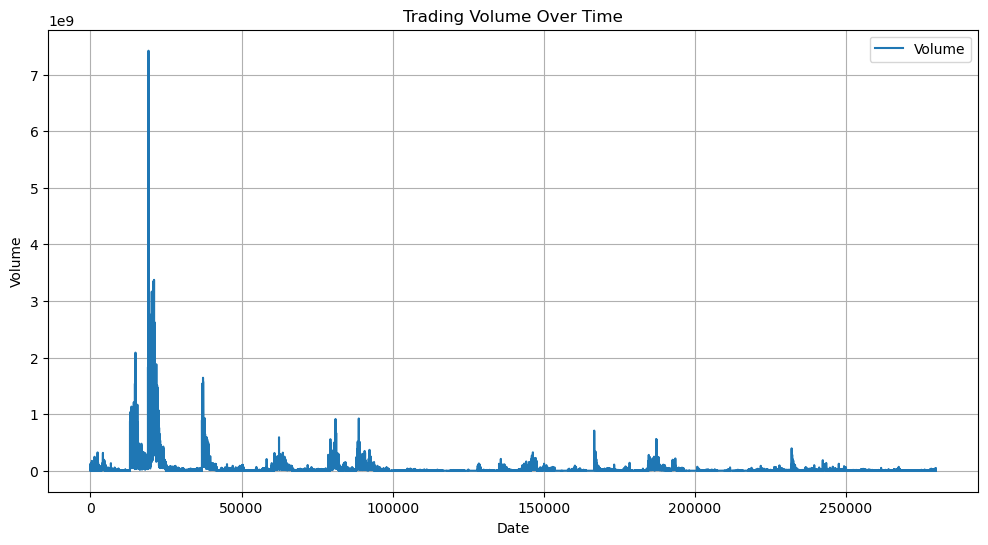

In [18]:

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(world_stock_prices_dataset_df.index, world_stock_prices_dataset_df['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



In [19]:
# Set a threshold for volume spikes (e.g., 2 times the standard deviation)
threshold = 2 * std_volume

# Find dates with volume spikes
volume_spikes = world_stock_prices_dataset_df[world_stock_prices_dataset_df['Volume'] > threshold]

print("Dates with Volume Spikes:")
print(volume_spikes)


Dates with Volume Spikes:
                             Date       Open       High        Low      Close  \
1366    2022-02-08 00:00:00-05:00  30.200001  40.349998  29.700001  37.270000   
2301    2004-07-16 00:00:00-04:00   3.834286   3.871429   3.265714   3.288571   
2365    2004-10-15 00:00:00-04:00   1.432857   1.641429   1.422857   1.471429   
4110    2011-09-20 00:00:00-04:00  20.200001  20.425714  18.481428  18.575714   
4135    2011-10-25 00:00:00-04:00  10.700000  11.341429  10.607143  11.052857   
...                           ...        ...        ...        ...        ...   
232021  2006-05-25 00:00:00-04:00   3.709898   4.239225   3.700692   4.234622   
232199  2007-02-09 00:00:00-05:00  10.888818  10.892508   9.191332   9.557583   
232382  2007-10-31 00:00:00-04:00  16.428641  18.028005  16.113952  17.577257   
232560  2008-07-17 00:00:00-04:00  25.498839  26.983605  25.317995  26.523615   
242326  2019-05-10 00:00:00-04:00  42.000000  45.000000  41.060001  41.570000   

 

In [20]:
correlation = world_stock_prices_dataset_df['Volume'].corr(world_stock_prices_dataset_df['Close'])
print(f"Correlation between Volume and Close Price: {correlation}")


Correlation between Volume and Close Price: -0.08056047591779933


In [21]:
# Get unique tickers from the 'Ticker' column
unique_tickers = world_stock_prices_dataset_df['Ticker'].unique()

# Enclose each ticker in single quotes and join them into a string separated by ', '
tickers_string = ', '.join([f"'{ticker}'" for ticker in unique_tickers])

# Print the tickers as a string with single quotes and separated by ', '
print("Unique Tickers:", tickers_string)


Unique Tickers: 'PTON', 'NFLX', 'COST', 'AMZN', 'AAPL', 'NKE', 'TGT', 'GOOGL', 'SPOT', 'ZM', 'DIS', 'RBLX', 'NTDOY', 'DAL', 'MSFT', 'LUV', 'AEO', 'TSLA', 'SBUX', 'NVDA', 'CRM', 'HMC', 'CL', 'HSY', 'POAHY', 'CMG', 'BAMXF', 'PINS', 'LOGI', 'SHOP', 'CROX', 'AMD', 'KO', 'ADDYY', 'AXP', 'PMMAF', 'V', 'ADBE', 'SQ', 'UL', 'CSCO', 'JPM', 'LVMUY', 'ABNB', 'MAR', 'UBSFY', 'ZI', 'TM', 'HLT', 'MCD', 'HD', 'MA', 'JNJ', 'UBER', 'PG', 'COIN', 'FDX', 'MMM', 'JWN', 'PHG', 'FL'


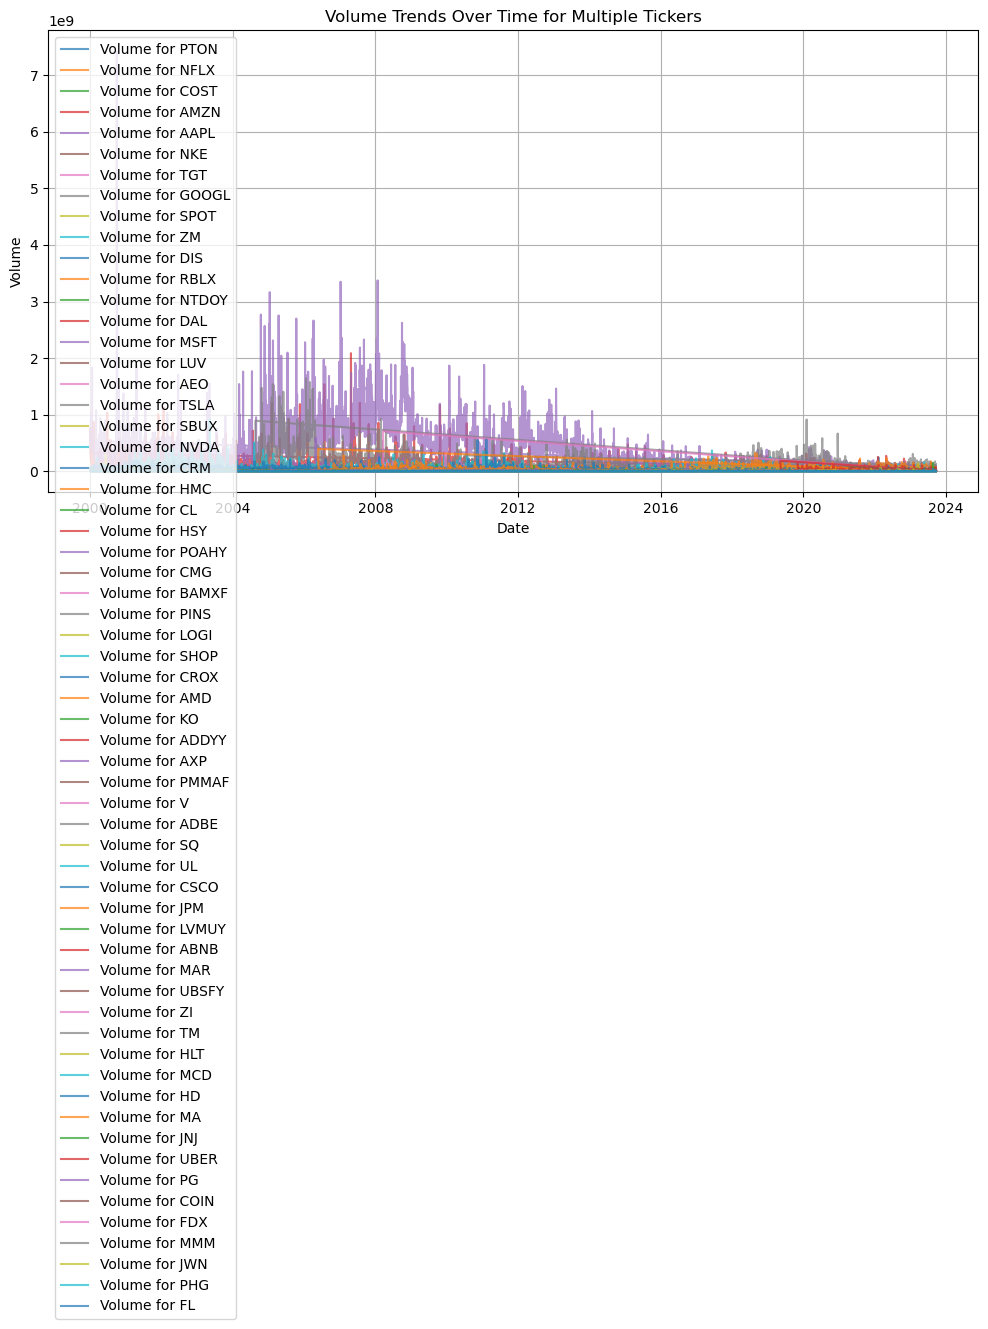

In [22]:

# Convert the 'Date' column to a datetime object with utc=True
world_stock_prices_dataset_df['Date'] = pd.to_datetime(world_stock_prices_dataset_df['Date'], utc=True)

# Set 'Date' as the index for time-based plotting
world_stock_prices_dataset_df.set_index('Date', inplace=True)

# List of tickers to plot
tickers_to_plot = ['PTON', 'NFLX', 'COST', 'AMZN', 'AAPL', 'NKE', 'TGT', 'GOOGL', 'SPOT', 'ZM', 'DIS', 'RBLX', 'NTDOY', 'DAL', 'MSFT', 'LUV', 'AEO', 'TSLA', 'SBUX', 'NVDA', 'CRM', 'HMC', 'CL', 'HSY', 'POAHY', 'CMG', 'BAMXF', 'PINS', 'LOGI', 'SHOP', 'CROX', 'AMD', 'KO', 'ADDYY', 'AXP', 'PMMAF', 'V', 'ADBE', 'SQ', 'UL', 'CSCO', 'JPM', 'LVMUY', 'ABNB', 'MAR', 'UBSFY', 'ZI', 'TM', 'HLT', 'MCD', 'HD', 'MA', 'JNJ', 'UBER', 'PG', 'COIN', 'FDX', 'MMM', 'JWN', 'PHG', 'FL']

# Plot volume trends over time for each ticker
plt.figure(figsize=(12, 6))
for ticker in tickers_to_plot:
    # Filter the DataFrame to get data for the specific ticker
    ticker_data = world_stock_prices_dataset_df[world_stock_prices_dataset_df['Ticker'] == ticker]
    
    # Plot the volume data for the ticker
    plt.plot(ticker_data.index, ticker_data['Volume'], label=f'Volume for {ticker}', alpha=0.7)

plt.title('Volume Trends Over Time for Multiple Tickers')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
# Calculate the total volume for each ticker
ticker_total_volume = world_stock_prices_dataset_df.groupby('Ticker')['Volume'].sum()

# Sort tickers based on total volume in descending order
sorted_tickers = ticker_total_volume.sort_values(ascending=False)

# Get the top N tickers with the most volume
top_n_tickers = 10  # Change this value to the desired number of top tickers
top_tickers = sorted_tickers.head(top_n_tickers)

# Print the list of top tickers with the most volume
print("Top", top_n_tickers, "Tickers with the Most Volume:")
print(top_tickers)


Top 10 Tickers with the Most Volume:
Ticker
AAPL     2.409086e+12
AMZN     7.314642e+11
GOOGL    5.838396e+11
NVDA     3.735403e+11
TSLA     3.210157e+11
MSFT     3.074923e+11
CSCO     2.598988e+11
AMD      1.953171e+11
JPM      1.202160e+11
KO       8.820484e+10
Name: Volume, dtype: float64


In [24]:
print(world_stock_prices_dataset_df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Brand_Name', 'Ticker', 'Industry_Tag', 'Country'],
      dtype='object')


## Relative Strength Index (RSI)

### 5 year RSI

In [25]:
# Calculate and add a new column 'Price Change' representing the daily price change
world_stock_prices_dataset_df['Price Change'] = world_stock_prices_dataset_df['Close'].diff()



In [26]:
# Assuming a look-back period of 5 years (1260 trading days)
look_back_period = 1260

# Calculate gains and losses using numpy
world_stock_prices_dataset_df['Gain'] = np.where(world_stock_prices_dataset_df['Price Change'] > 0, world_stock_prices_dataset_df['Price Change'], 0)
world_stock_prices_dataset_df['Loss'] = np.where(world_stock_prices_dataset_df['Price Change'] < 0, -world_stock_prices_dataset_df['Price Change'], 0)

# Calculate average gain and average loss over the 5-year look-back period
average_gain = world_stock_prices_dataset_df['Gain'].rolling(window=look_back_period).mean()
average_loss = world_stock_prices_dataset_df['Loss'].rolling(window=look_back_period).mean()

# Calculate relative strength (RS)
relative_strength = average_gain / average_loss

# Calculate RSI
rsi = 100 - (100 / (1 + relative_strength))



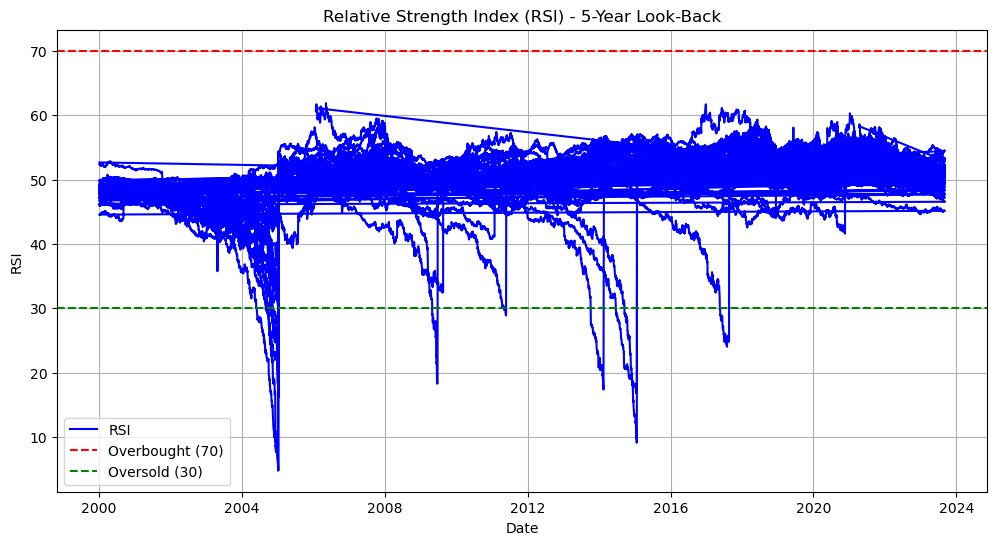

In [27]:
# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(world_stock_prices_dataset_df.index, rsi, label='RSI', color='b')
plt.title('Relative Strength Index (RSI) - 5-Year Look-Back')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


### 10 year RSI

In [28]:
# Calculate and add a new column 'Price Change' representing the daily price change
world_stock_prices_dataset_df['Price Change'] = world_stock_prices_dataset_df['Close'].diff()


In [29]:
# Assuming a look-back period of 10 years (5040 trading days)
look_back_period = 5040

# Calculate gains and losses using numpy
world_stock_prices_dataset_df['Gain'] = np.where(world_stock_prices_dataset_df['Price Change'] > 0, world_stock_prices_dataset_df['Price Change'], 0)
world_stock_prices_dataset_df['Loss'] = np.where(world_stock_prices_dataset_df['Price Change'] < 0, -world_stock_prices_dataset_df['Price Change'], 0)

# Calculate average gain and average loss over the look-back period
average_gain = world_stock_prices_dataset_df['Gain'].rolling(window=look_back_period).mean()
average_loss = world_stock_prices_dataset_df['Loss'].rolling(window=look_back_period).mean()

# Calculate relative strength (RS)
relative_strength = average_gain / average_loss

# Calculate RSI
rsi = 100 - (100 / (1 + relative_strength))

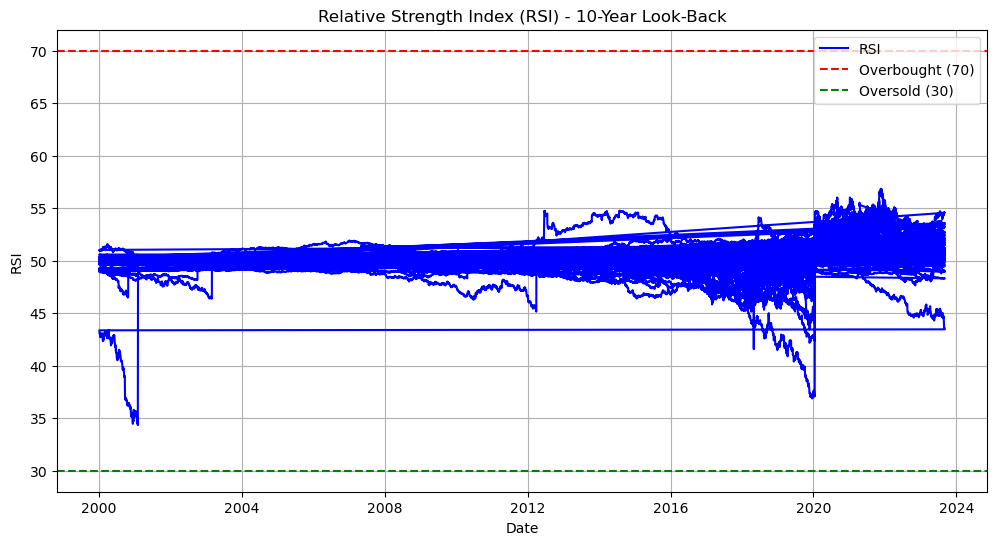

In [30]:

# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(world_stock_prices_dataset_df.index, rsi, label='RSI', color='b')
plt.title('Relative Strength Index (RSI) - 10-Year Look-Back')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


## Top 50 tickers with the best RSI values:
 

In [31]:
# Assuming a look-back period of 5 years (1260 trading days)
look_back_period = 1260

# Create a DataFrame to store the latest RSI values for each ticker
rsi_summary_df = pd.DataFrame(columns=['Ticker', 'RSI'])

# Loop through each unique ticker in your DataFrame
for ticker in world_stock_prices_dataset_df['Ticker'].unique():
    # Filter the DataFrame to get data for the current ticker and create a copy
    ticker_data = world_stock_prices_dataset_df[world_stock_prices_dataset_df['Ticker'] == ticker].copy()
    
    # Calculate gains and losses using numpy
    ticker_data['Gain'] = np.where(ticker_data['Price Change'] > 0, ticker_data['Price Change'], 0)
    ticker_data['Loss'] = np.where(ticker_data['Price Change'] < 0, -ticker_data['Price Change'], 0)
    
    # Calculate average gain and average loss over the look-back period
    average_gain = ticker_data['Gain'].rolling(window=look_back_period).mean()
    average_loss = ticker_data['Loss'].rolling(window=look_back_period).mean()
    
    # Calculate relative strength (RS)
    relative_strength = average_gain / average_loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + relative_strength))
    
    # Get the latest RSI value for the ticker
    latest_rsi = rsi.iloc[-1]
    
    # Append the ticker and its latest RSI value to rsi_summary_df
    rsi_summary_df = rsi_summary_df.append({'Ticker': ticker, 'RSI': latest_rsi}, ignore_index=True)

# Sort rsi_summary_df by RSI values in descending order
rsi_summary_df.sort_values(by='RSI', ascending=False, inplace=True)

# Select the top 50 tickers with the best RSI values
top_50_rsi_tickers = rsi_summary_df.head(50)


/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/888955391.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rsi_summary_df = rsi_summary_df.append({'Ticker': ticker, 'RSI': latest_rsi}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/888955391.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rsi_summary_df = rsi_summary_df.append({'Ticker': ticker, 'RSI': latest_rsi}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel_20657/888955391.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rsi_summary_df = rsi_summary_df.append({'Ticker': ticker, 'RSI': latest_rsi}, ignore_index=True)
/var/folders/55/lcmzlzjj1n3gdnlj03vgkdy80000gn/T/ipykernel

In [32]:
# Display the top 50 tickers with the best RSI values (over 5 years)
print("Top 50 tickers with the best RSI values:")
print(top_50_rsi_tickers)


Top 50 tickers with the best RSI values:
   Ticker        RSI
19   NVDA  54.435602
4    AAPL  53.314710
2    COST  53.234255
23    HSY  53.230620
25    CMG  53.214159
14   MSFT  53.054650
54     PG  52.891097
49    MCD  52.887852
42  LVMUY  52.231257
7   GOOGL  52.196437
17   TSLA  52.058950
50     HD  51.966102
31    AMD  51.880789
51     MA  51.880446
32     KO  51.828564
18   SBUX  51.822253
37   ADBE  51.794154
30   CROX  51.748744
36      V  51.742966
48    HLT  51.703825
44    MAR  51.433029
52    JNJ  51.399170
26  BAMXF  51.368231
47     TM  51.289374
34    AXP  51.248296
40   CSCO  51.242481
41    JPM  51.210274
29   SHOP  51.094388
6     TGT  50.962940
28   LOGI  50.933676
22     CL  50.883864
21    HMC  50.829304
20    CRM  50.818567
3    AMZN  50.737925
5     NKE  50.601900
12  NTDOY  50.450885
1    NFLX  50.410504
35  PMMAF  50.382168
56    FDX  50.374811
39     UL  50.142474
24  POAHY  49.976910
8    SPOT  49.699877
38     SQ  49.647723
33  ADDYY  49.558112
16    AEO  49.

## Industy analysis 
#### Find which industries are the best long term investments

In [33]:
print(world_stock_prices_dataset_df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Price Change',
       'Gain', 'Loss'],
      dtype='object')


In [34]:
# Create a DataFrame and group by Industry_Tag
industry_groups = world_stock_prices_dataset_df.groupby('Industry_Tag')


In [35]:
# Group the DataFrame by 'Year' column and calculate the mean for each group.
industry_groups = world_stock_prices_dataset_df.groupby(['Date', 'Industry_Tag', 'Ticker'])['Close'].mean().reset_index()
industry_groups.head()


,Date,Industry_Tag,Ticker,Close
0,2000-01-03 05:00:00+00:00,apparel,AEO,5.482471
1,2000-01-03 05:00:00+00:00,apparel,NKE,4.670587
2,2000-01-03 05:00:00+00:00,automotive,HMC,13.720699
3,2000-01-03 05:00:00+00:00,automotive,TM,72.034958
4,2000-01-03 05:00:00+00:00,aviation,LUV,9.467610


In [36]:
industry_stats = industry_groups.groupby('Industry_Tag')['Close'].agg(['mean', 'median', 'std'])


In [37]:
industry_performance = industry_groups.groupby('Industry_Tag')['Close'].mean().sort_values(ascending=False)



In [38]:
industry_performance # by average closing price 

Industry_Tag
food                  295.255910
music                 174.041788
cryptocurrency        141.231925
logistics             115.812006
entertainment          93.615774
manufacturing          85.445979
financial services     84.137238
finance                81.492391
retail                 78.369761
hospitality            72.329387
healthcare             72.266088
automotive             52.481159
luxury goods           51.413180
technology             50.060358
fitness                50.025868
food & beverage        44.227335
consumer goods         42.831908
apparel                38.608794
e-commerce             38.331886
social media           35.299182
footwear               26.974082
aviation               26.691601
gaming                 10.043163
Name: Close, dtype: float64

## Average returns per stock ticker grouped, by industry 

In [39]:
# Calculate the daily returns as a percentage change in the 'Close' price
world_stock_prices_dataset_df['Returns'] = world_stock_prices_dataset_df.groupby('Ticker')['Close'].pct_change() * 100

# Group the DataFrame by 'Industry_Tag' and 'Ticker' columns and calculate the mean return for each group
average_returns_by_industry = world_stock_prices_dataset_df.groupby(['Industry_Tag', 'Ticker'])['Returns'].mean().reset_index()

# Print the DataFrame with average returns by industry and ticker
print(average_returns_by_industry)


   Industry_Tag Ticker   Returns
0       apparel  ADDYY  0.044346
1       apparel    AEO  0.060643
2       apparel    NKE  0.055060
3       apparel  PMMAF  0.053712
4    automotive  BAMXF  0.047357
..          ...    ...       ...
56   technology   NVDA  0.161351
57   technology    PHG  0.028350
58   technology   UBER  0.063950
59   technology     ZI  0.128125
60   technology     ZM  0.085043

[61 rows x 3 columns]


## Average returns per industry 

In [40]:
# Calculate the daily returns as a percentage change in the 'Close' price
world_stock_prices_dataset_df['Returns'] = world_stock_prices_dataset_df.groupby('Ticker')['Close'].pct_change() * 100

# Group the DataFrame by 'Industry_Tag' and calculate the mean return for each industry
average_returns_by_industry = world_stock_prices_dataset_df.groupby('Industry_Tag')['Returns'].mean().reset_index()

# Print the DataFrame with average returns by industry
print(average_returns_by_industry)


          Industry_Tag   Returns
0              apparel  0.054163
1           automotive  0.050365
2             aviation  0.045957
3       consumer goods  0.023671
4       cryptocurrency  0.459701
5           e-commerce  0.121472
6        entertainment  0.089647
7              finance  0.060625
8   financial services  0.116172
9              fitness  0.357545
10                food  0.061626
11     food & beverage  0.042446
12            footwear  0.080643
13              gaming  0.053220
14          healthcare  0.023932
15         hospitality  0.051586
16           logistics  0.038801
17        luxury goods  0.086660
18       manufacturing  0.024320
19               music  0.047699
20              retail  0.043196
21        social media  0.096125
22          technology  0.080308


## Industry correlation

In [41]:
# Calculate the daily returns as a percentage change in the 'Close' price
world_stock_prices_dataset_df['Returns'] = world_stock_prices_dataset_df.groupby('Ticker')['Close'].pct_change() * 100

# Pivot the DataFrame to have industries as columns and dates as rows
industry_returns_pivot = world_stock_prices_dataset_df.pivot_table(index='Date', columns='Industry_Tag', values='Returns')

# Calculate the correlation between industry returns
industry_correlation = industry_returns_pivot.corr()

# Print the correlation matrix
industry_correlation 


Industry_Tag,apparel,automotive,aviation,consumer goods,cryptocurrency,e-commerce,entertainment,finance,financial services,fitness,...,gaming,healthcare,hospitality,logistics,luxury goods,manufacturing,music,retail,social media,technology
Industry_Tag,,,,,,,,,,,,,,,,,,,,,
apparel,1.000000,0.554670,0.496524,0.550719,0.167649,0.418844,0.469353,0.631401,0.385129,0.109239,...,0.357419,0.502223,0.614248,0.573784,0.340134,0.585439,0.337778,0.712713,0.358893,0.611405
automotive,0.554670,1.000000,0.461662,0.521930,0.180705,0.409133,0.469246,0.591766,0.433396,0.117569,...,0.418860,0.472664,0.577888,0.540711,0.341905,0.563260,0.407314,0.569961,0.378765,0.616584
aviation,0.496524,0.461662,1.000000,0.428897,0.154750,0.333784,0.417317,0.571184,0.320141,0.052870,...,0.279685,0.402325,0.583123,0.549380,0.222379,0.508303,0.254640,0.555819,0.308332,0.497422
consumer goods,0.550719,0.521930,0.428897,1.000000,0.044290,0.368517,0.435744,0.605729,0.213632,0.072088,...,0.338892,0.739774,0.538535,0.579674,0.280401,0.673439,0.127393,0.623130,0.213832,0.529823
cryptocurrency,0.167649,0.180705,0.154750,0.044290,1.000000,0.210475,0.188265,0.156277,0.203635,0.160721,...,0.161079,0.023110,0.191271,0.116389,0.143766,0.126164,0.186388,0.196077,0.177396,0.220875
e-commerce,0.418844,0.409133,0.333784,0.368517,0.210475,1.000000,0.449265,0.473905,0.573519,0.201328,...,0.282614,0.337507,0.446878,0.421663,0.214326,0.405486,0.571819,0.474414,0.528020,0.607966
entertainment,0.469353,0.469246,0.417317,0.435744,0.188265,0.449265,1.000000,0.523458,0.475316,0.157824,...,0.304747,0.406335,0.504918,0.467469,0.224956,0.473807,0.529612,0.520403,0.462486,0.579833
finance,0.631401,0.591766,0.571184,0.605729,0.156277,0.473905,0.523458,1.000000,0.451383,0.055582,...,0.357831,0.567902,0.679546,0.628089,0.295680,0.655349,0.343961,0.695892,0.367122,0.696161
financial services,0.385129,0.433396,0.320141,0.213632,0.203635,0.573519,0.475316,0.451383,1.000000,0.225269,...,0.332436,0.172921,0.414222,0.329740,0.402894,0.267099,0.551610,0.374003,0.538163,0.602596


In [42]:
# Plot industry returns over 10 years